In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/akay6483/mmml-ecommerce/main/dataset/E-commerce%20Customer%20Behavior%20-%20Sheet1.csv"
df = pd.read_csv(url)

df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
# 1. Correct Mapping for Satisfaction Level
satisfaction_map = {'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2}
df['Satisfaction_Numeric'] = df['Satisfaction Level'].map(satisfaction_map)
df['Satisfaction_Numeric'] = df['Satisfaction_Numeric'].fillna(1) # Fill missing with Neutral (1)

# 2. Convert Boolean 'Discount Applied' to Integer (1/0)
df['Discount_Numeric'] = df['Discount Applied'].astype(int)

# 3. Map Gender
df['Gender_Numeric'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define Features and Target
features = ['Age', 
            'Gender_Numeric', 
            'Items Purchased', 
            'Average Rating', 
            'Discount_Numeric', 
            'Days Since Last Purchase', 
            'Satisfaction_Numeric']

X = df[features]
y = df['Total Spend']

print("Preprocessing complete. Missing values check:")
print(X.isnull().sum())

Preprocessing complete. Missing values check:
Age                         0
Gender_Numeric              0
Items Purchased             0
Average Rating              0
Discount_Numeric            0
Days Since Last Purchase    0
Satisfaction_Numeric        0
dtype: int64


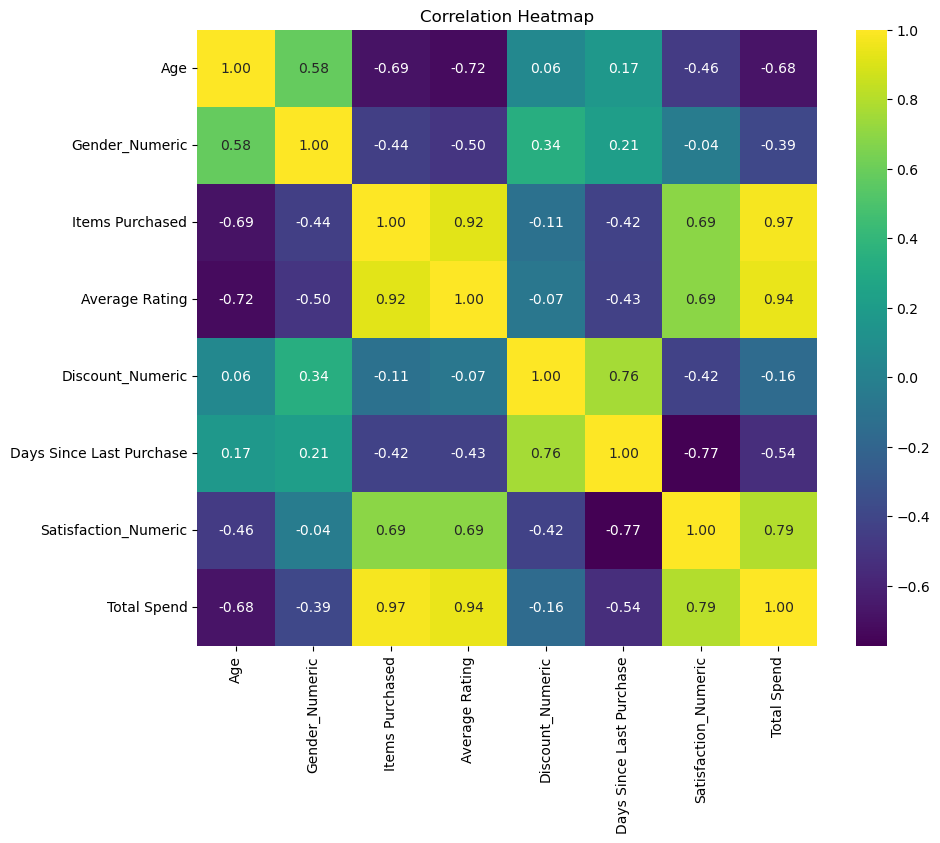

In [4]:
plt.figure(figsize=(10, 8))
# Combine X and y just for the plot
heatmap_data = pd.concat([X, y], axis=1)
sns.heatmap(heatmap_data.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Make sure everything is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Fill NaNs with median for each column
X = X.fillna(X.median())
y = y.fillna(y.median())

print("NaNs in X:\n", X.isnull().sum())
print("NaNs in y:", y.isnull().sum())

NaNs in X:
 Age                         0
Gender_Numeric              0
Items Purchased             0
Average Rating              0
Discount_Numeric            0
Days Since Last Purchase    0
Satisfaction_Numeric        0
dtype: int64
NaNs in y: 0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")

Training samples: 280
Testing samples:  70


In [7]:
# Initialize Decision Tree Regressor
# max_depth=5 prevents the tree from becoming too complex (overfitting)
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

tree_model.fit(X_train, y_train)

print("Decision Tree Model trained successfully.")
print(f"Model Depth: {tree_model.get_depth()}")
print(f"Number of Leaves: {tree_model.get_n_leaves()}")

Decision Tree Model trained successfully.
Model Depth: 5
Number of Leaves: 28


In [8]:
# Make Predictions
y_pred = tree_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE
mask = y_test != 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100

# Create DataFrame
metrics_table = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R² Score', 'MAPE (%)'],
    'Value': [mae, mse, rmse, r2, mape]
})

# Display
pd.options.display.float_format = '{:,.4f}'.format
print("--- Decision Tree Performance ---")
display(metrics_table)

--- Decision Tree Performance ---


,Metric,Value
0,Mean Absolute Error (MAE),5.6912
1,Mean Squared Error (MSE),89.9015
2,Root Mean Squared Error (RMSE),9.4816
3,R² Score,0.9993
4,MAPE (%),0.6746


C:\Users\PC\AppData\Local\Temp\ipykernel_4728\1858129050.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, ax=axes[1], palette='Oranges_r')


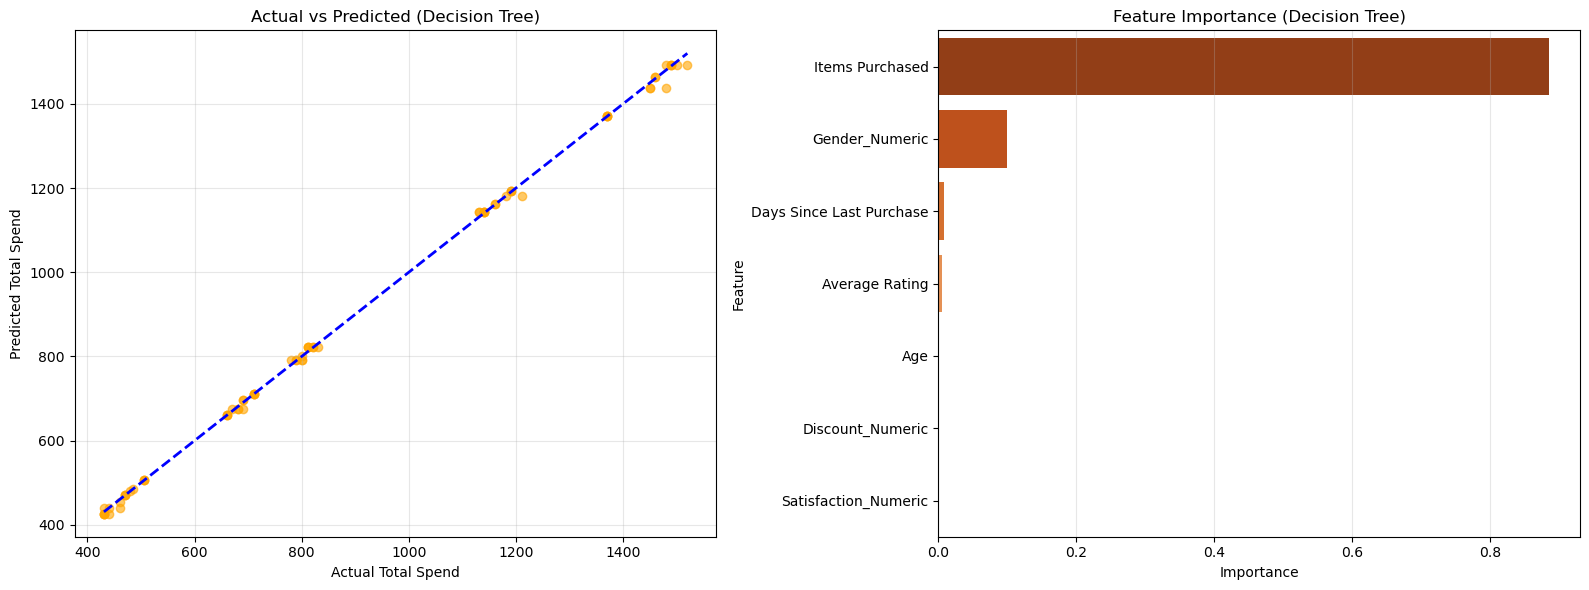

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6, color='orange')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2) # Blue dashed line for perfect fit
axes[0].set_xlabel("Actual Total Spend")
axes[0].set_ylabel("Predicted Total Spend")
axes[0].set_title("Actual vs Predicted (Decision Tree)")
axes[0].grid(True, alpha=0.3)

# Plot 2: Feature Importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df, ax=axes[1], palette='Oranges_r')
axes[1].set_title("Feature Importance (Decision Tree)")
axes[1].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

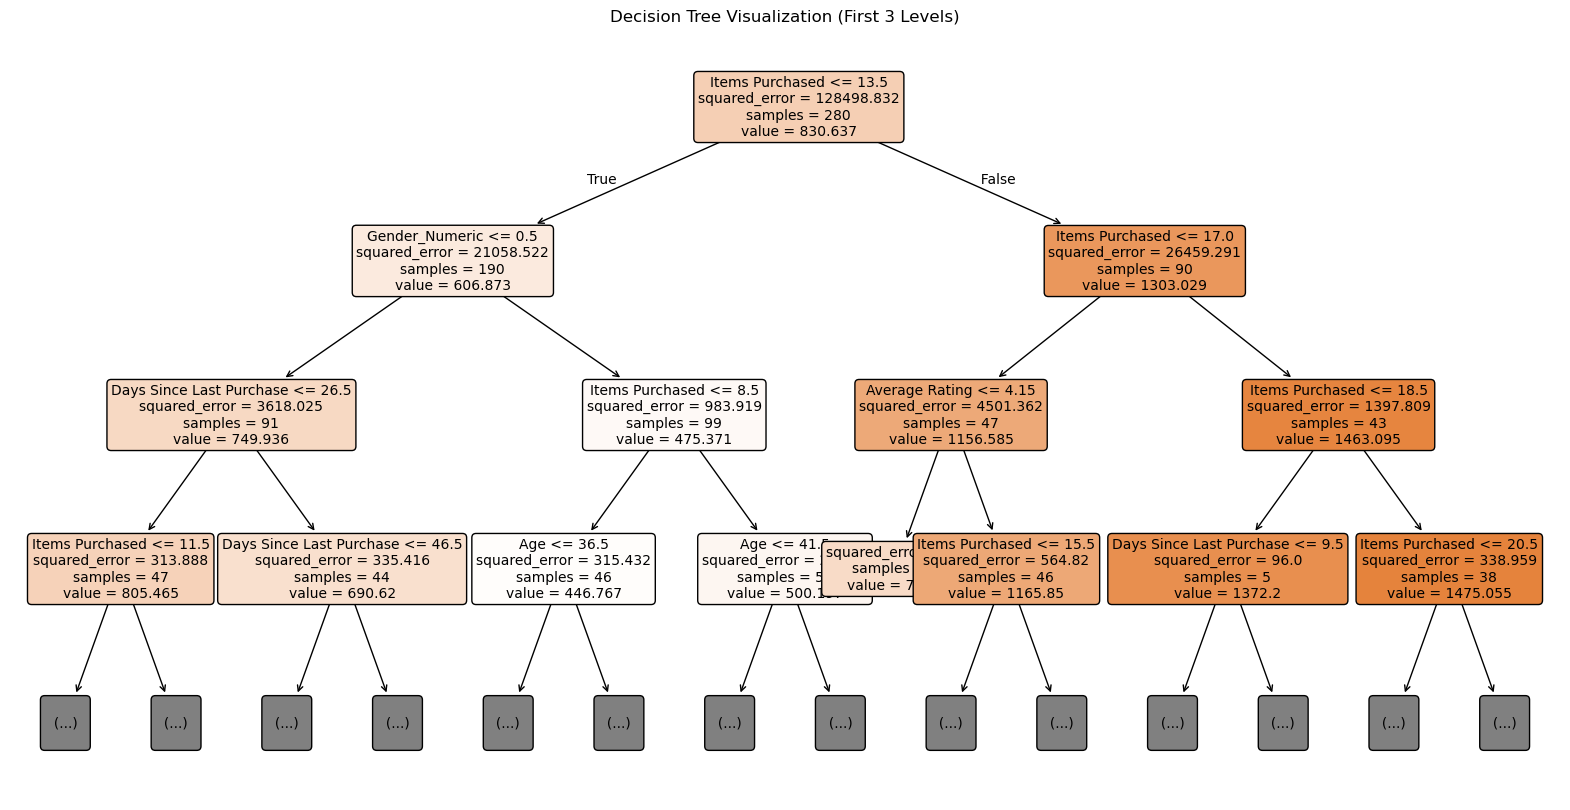

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=3) # Limit depth for readability
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()